# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Hypothesis Testing in Python</h1>

Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback and supply-chain data for medical supply shipments, you'll gain a deep understanding of how these tests work and the key assumptions that underpin them. You'll also discover how non-parametric tests can be used to go beyond the limitations of traditional hypothesis tests.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Introduction to Hypothesis Testing](#1)
    - Hypothesis tests and z-scores
    - p-values
    - Statistical significance

* [2. Two-Sample and ANOVA Tests](#2) 
    - Performing t-tests
    - Calculating p-values from t-statistics
    - Paired t-tests
    - ANOVA tests
    
* [3. Proportion Tests](#3)
    - One-sample roportion tests
    - Two-sample roportion tests
    - Chi-square test of indepence
    - Chi-square goodness of fit tests
    
* [4. Non-Parametric Tests](#4)
    - Assumptions in hypothesis testing
    - Non-parametric tests
    - Non-parametric ANOVA and unpaired t-tests
    - Congratulations

## Explore Datasets

Use the DataFrames imported in the first cell to explore the data and practice your skills!

In [15]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

In [16]:
republican_votes.head(3)

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367


In [17]:
democrat_votes.head(3)

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517


In [18]:
shipments.head(3)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.0,4.8,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57


In [19]:
stackoverflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Introduction to Hypothesis Testing</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

How does hypothesis testing work and what problems can it solve? To find out, you’ll walk through the workflow for a one sample proportion test. In doing so, you'll encounter important concepts like z-scores, p-values, and false negative and false positive errors.

### 1 01 Hypothesis tests and z-scores

1. Hypothesis tests and z-scores

Hi, I'm James. Welcome to this course on hypothesis testing in Python. To start, let's look at a real-world example where a hypothesis test was crucial in a decision-making process.

2. A/B testing

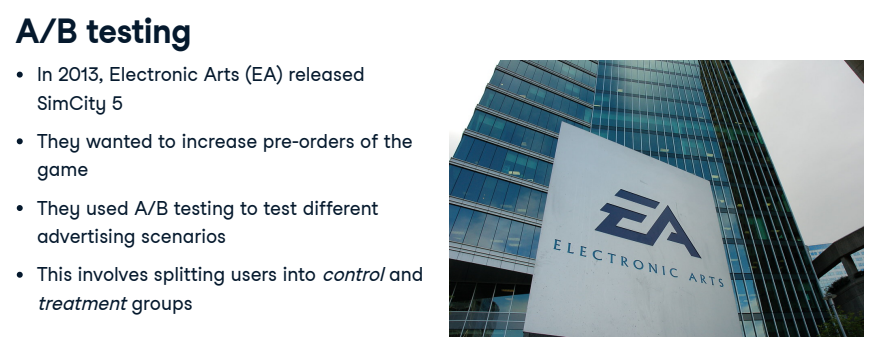

In 2013, Electronic Arts, or EA, launched a video game called SimCity 5. Leading up to its release, they wanted to increase pre-order sales. They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different advertising scenarios and see which improved sales the most. Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.

3. Retail webpage A/B test

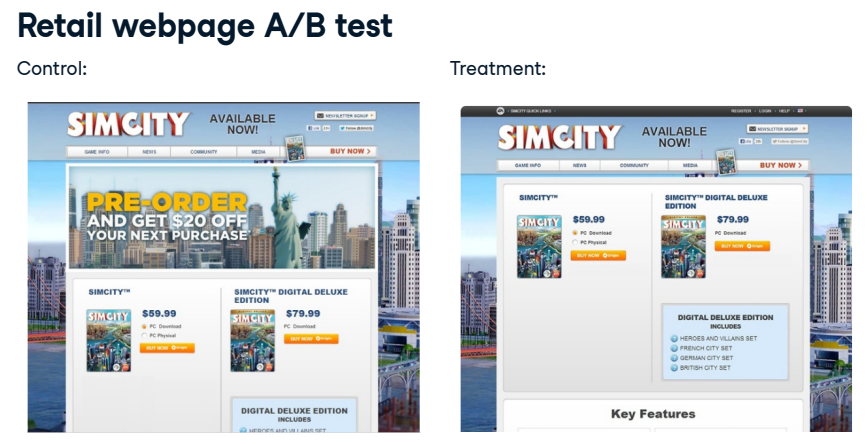

Here's each version of the SimCity 5 pre-order page. The control group saw the version with a banner advertising money off their next purchase with each pre-order. The treatment group saw the version without the banner. EA compared the percentage of checkouts for the two groups to see which performed best. Our naive guess would be that the advertisement increased pre-order sales.

4. A/B test results

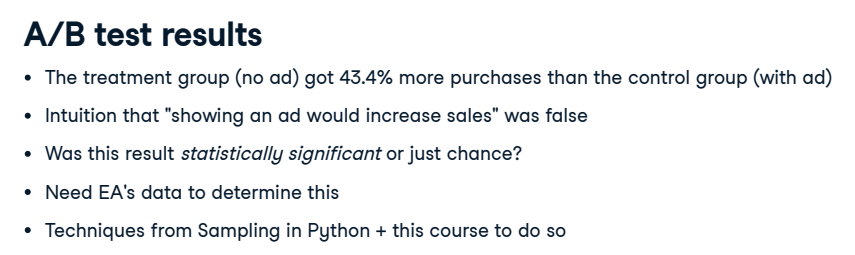

The results of the A/B test were surprising. The treatment page without the advertisement resulted in 43 percent higher sales than the control page with the advert. The experiment proved that our intuition that more discount adverts would result in more sales was false. We might ask ourselves, was the 43 percent difference a meaningful difference between the control and treatment groups, or was it just random chance? To get this answer, we'd need the original dataset from EA, which isn't publicly available. However, the method to answering this question of significance would involve techniques from both the Sampling in Python course and from this course.

5. Stack Overflow Developer Survey 2020

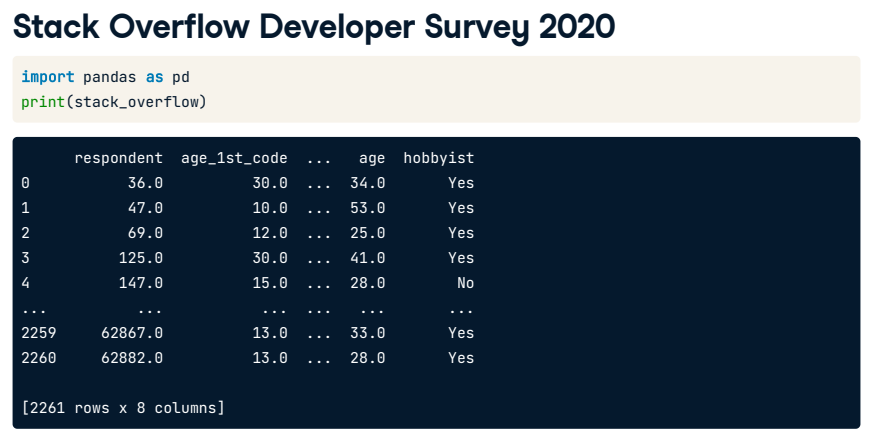

Each year, Stack Overflow surveys its users, who are primarily software developers, about themselves, how they use Stack Overflow, their work, and the development tools they use. In this course, we'll look at a subset of the survey responses from users who identified as Data Scientists.

6. Hypothesizing about the mean

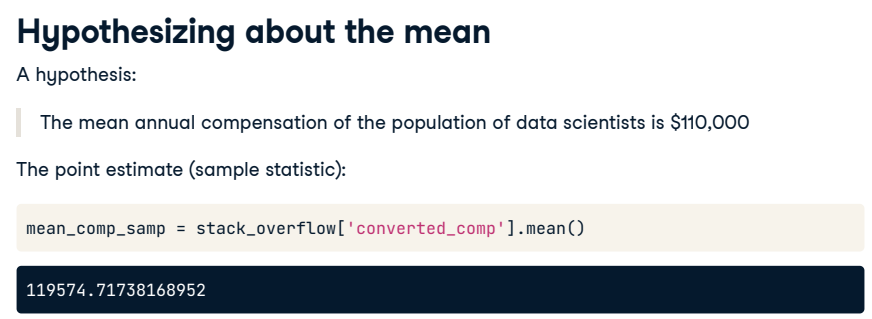

Let's hypothesize that the mean annual compensation of the population of data scientists is 110,000 dollars. We can initially examine the mean annual compensation from the sample survey data. Annual compensation, converted to dollars, is stored in the converted_comp column. The sample mean is a type of point estimate, which is another name for a summary statistic. We can calculate it with pandas using the dot-mean method on the converted_comp Series. The result is different from our hypothesis, but is it meaningfully different?

7. Generating a bootstrap distribution

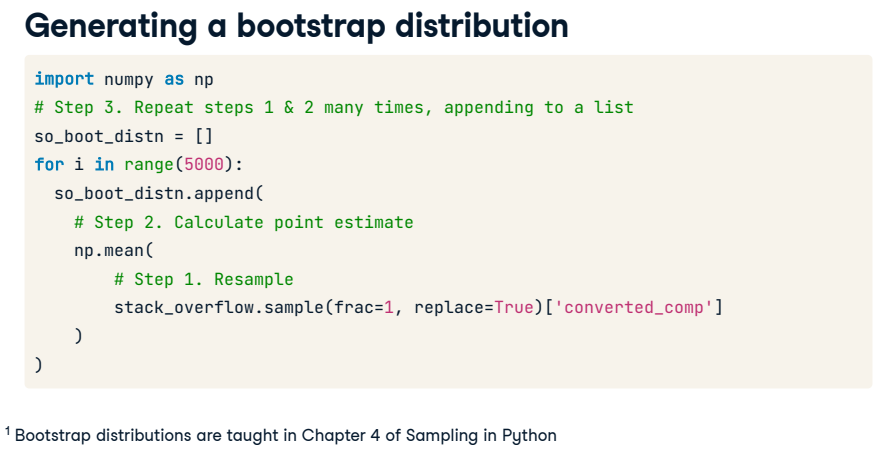

To answer this, we need to generate a bootstrap distribution of sample means. This is done by resampling the dataset, calculating the sample mean for that resample, then repeating those steps to create a list of sample means.

1 Bootstrap distributions are taught in Chapter 4 of Sampling in Python

8. Visualizing the bootstrap distribution

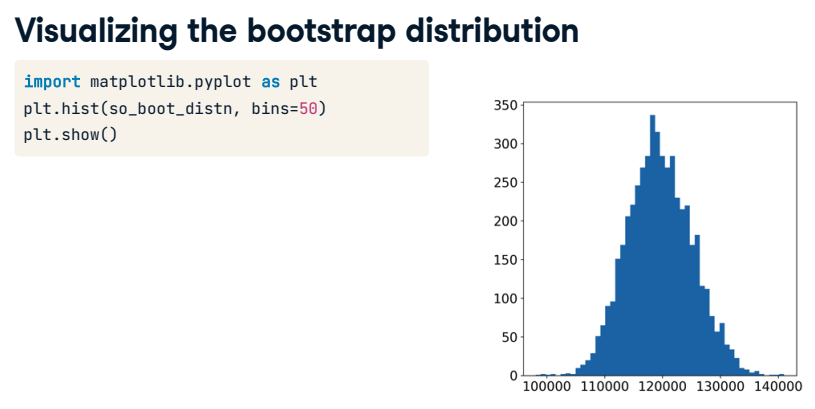

Here's a histogram of the bootstrap distribution. Its bell shape means that it's roughly normally distributed. Notice that 110,000 is on the left of the distribution.

9. Standard error

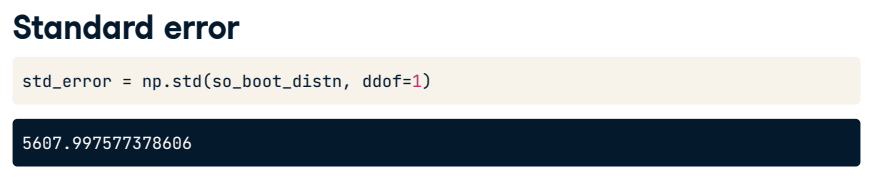

Recall that the standard deviation of the sample statistics in the bootstrap distribution estimates the standard error of the statistic.

10. z-scores

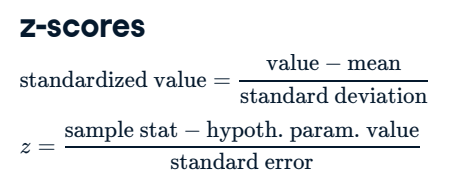

Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values. A common way of standardizing values is to subtract the mean, and divide by the standard deviation. For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error. The result is called a z-score.

11. z-scores

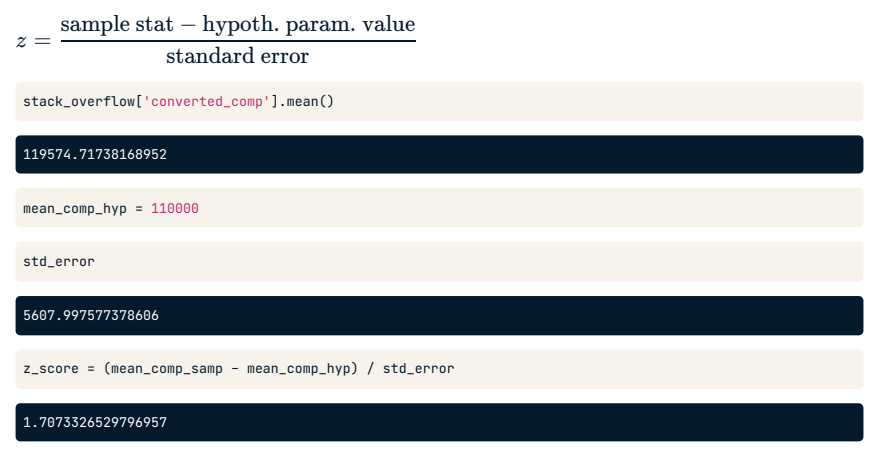

Here are the values we calculated earlier. The sample mean annual compensation for data scientists of around 120,000 dollars, minus the hypothesized compensation of 110,000, divided by the standard error gives a z-score of one-point-seven-zero-seven.

12. Testing the hypothesis

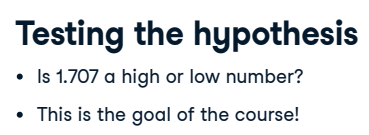

Is that a big or small number? Determining that is the goal of this course.

13. Testing the hypothesis

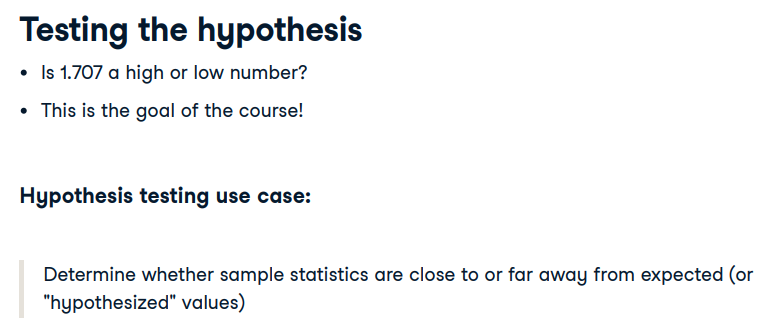

In particular, we can now state one of the uses of hypothesis testing: determining whether a sample statistic is close to or far away from an expected value.

14. Standard normal (z) distribution

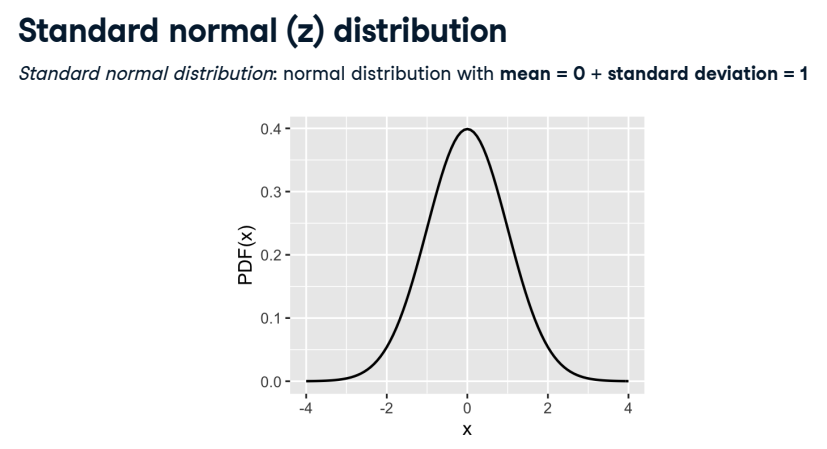

One final thing. Here's a plot of the probability density function for the standard normal distribution, which is a normal distribution with mean of zero and standard deviation of one. It's often called the z-distribution, and z-scores are related to this distribution. We'll encounter the z-distribution throughout this course.

15. Let's practice!

Time to begin!

**Uses of A/B testing**

In the video, you saw how Electronic Arts used A/B testing on their website when launching SimCity 5. One version of the page showed an advertisement for a discount, and one version did not. Half the users saw one version of the page, and the other half saw the second version of the page.

- What is the main reason to use an A/B test?

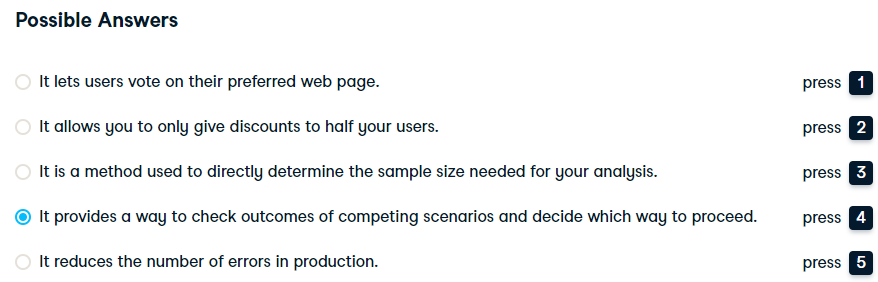

Ace A/B testing! A/B testing lets you compare scenarios to see which best achieves some goal.

**Exercise**

**Calculating the sample mean**

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()

late_shipments is available, and pandas is loaded as pd.

**Instructions**

- Print the late_shipments dataset.

- Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".

In [20]:
late_shipments = shipments.copy()

In [21]:
# Print the late_shipments dataset
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

In [22]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

Cool calculating! The proportion of late shipments in the sample is 0.061, or 6.1%.

**Exercise**

**Calculating a z-score**

Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

**Instructions**

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the standard error from the standard deviation of the bootstrap distribution.
- Calculate the z-score.

In [23]:
late_prop_samp

0.061

In [25]:
(late_shipments.sample(frac=1, replace=True)['late']=='Yes').mean()

0.054

In [26]:
(late_shipments['late'] == "Yes").mean()

0.061

In [27]:
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
        np.mean(late_shipments.sample(frac=1, replace=True)['late']=='Yes'))
    
# Print the result
print(late_shipments_boot_distn)

[0.056, 0.078, 0.06, 0.068, 0.058, 0.056, 0.052, 0.069, 0.058, 0.081, 0.062, 0.062, 0.051, 0.059, 0.068, 0.06, 0.06, 0.048, 0.064, 0.06, 0.06, 0.054, 0.07, 0.071, 0.056, 0.054, 0.059, 0.056, 0.063, 0.053, 0.061, 0.07, 0.068, 0.059, 0.061, 0.056, 0.078, 0.058, 0.05, 0.063, 0.053, 0.045, 0.054, 0.074, 0.065, 0.07, 0.054, 0.066, 0.058, 0.079, 0.058, 0.057, 0.069, 0.059, 0.064, 0.071, 0.054, 0.073, 0.053, 0.067, 0.067, 0.048, 0.054, 0.08, 0.058, 0.065, 0.054, 0.049, 0.073, 0.051, 0.066, 0.052, 0.068, 0.075, 0.074, 0.064, 0.067, 0.063, 0.057, 0.066, 0.054, 0.07, 0.048, 0.065, 0.064, 0.063, 0.054, 0.062, 0.046, 0.066, 0.055, 0.044, 0.052, 0.068, 0.065, 0.05, 0.066, 0.06, 0.054, 0.064, 0.074, 0.07, 0.052, 0.062, 0.061, 0.062, 0.049, 0.061, 0.048, 0.067, 0.056, 0.049, 0.07, 0.055, 0.066, 0.068, 0.063, 0.069, 0.066, 0.047, 0.053, 0.062, 0.053, 0.054, 0.052, 0.079, 0.058, 0.06, 0.058, 0.067, 0.06, 0.06, 0.053, 0.068, 0.058, 0.052, 0.069, 0.052, 0.051, 0.066, 0.056, 0.053, 0.082, 0.068, 0.067, 0.

In [28]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.1330923305722692


Zesty z-scoring! The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

### 1 02 p-values

1. p-values

Hypothesis tests are like criminal trials.

2. Criminal trials

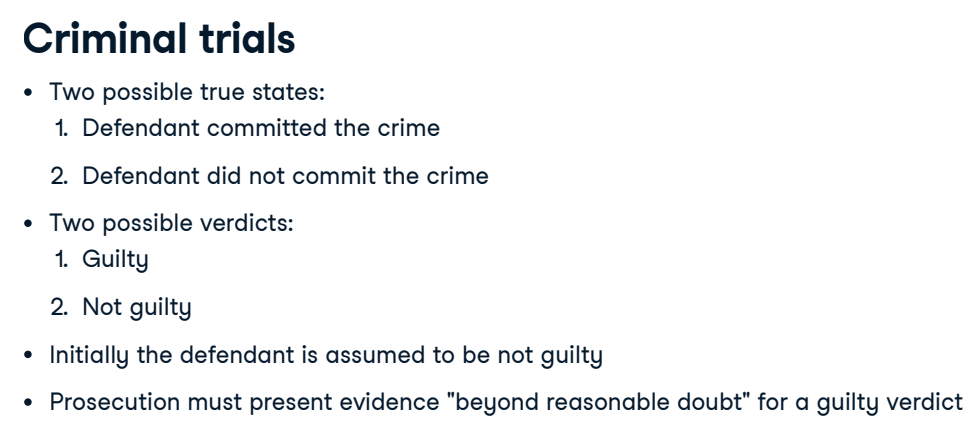

There are two possible true states: the defendant either committed the crime, or didn't. There are also two possible outcomes: a guilty or not guilty verdict. The initial assumption is that the defendant is not guilty, and the prosecution team must present evidence beyond a reasonable doubt that the defendant committed the crime for a guilty verdict to be given.

3. Age of first programming experience

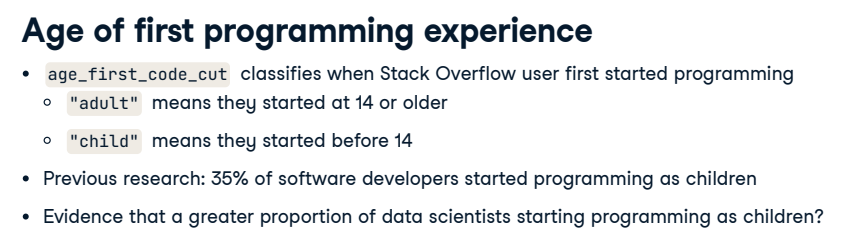

Let's return to the Stack Overflow survey. The age_first_code_cut variable classifies when the user began programming. If they were 14 or older, they are classified as adult; otherwise, child. Suppose previous research suggests that 35 percent of software developers programmed as children. This raises a question answerable with our dataset. Does our sample provide evidence that a greater proportion of data scientists started programming as children?

4. Definitions

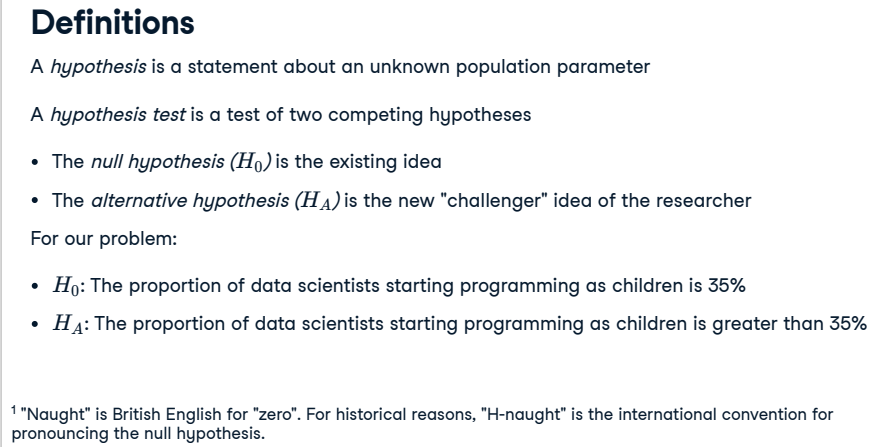

Let's specify some definitions. A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data. Hypothesis tests compare two competing hypotheses. These two hypotheses are the null hypothesis, representing the existing idea, and the alternative hypothesis, representing a new idea that challenges the existing one. They are denoted H-naught and H-A, respectively. Here, the null hypothesis is that the proportion of data scientists that started programming as children follows the research on software developers, at 35 percent. The alternative hypothesis is that the percentage is greater than 35.

1 "Naught" is British English for "zero". For historical reasons, "H-naught" is the international convention for pronouncing the null hypothesis.

5. Criminal trials vs. hypothesis testing

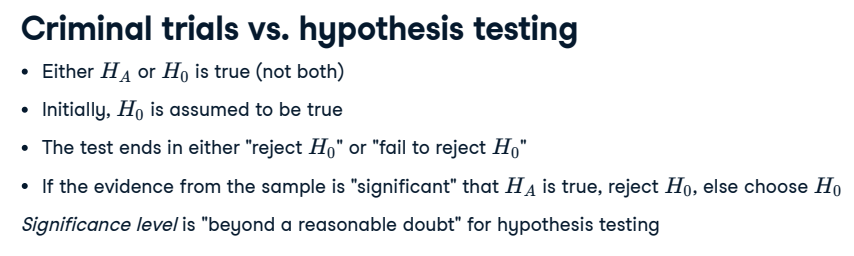

Returning to our criminal trial comparison, the defendant can be either guilty or not guilty, and likewise, only one of the hypotheses can be true. Initially, the defendant is assumed to be not guilty and, similarly, we initially assume that the null hypothesis is true. This only changes if the sample provides enough evidence to reject it. Rather than saying we accept the alternative hypothesis, it is convention to refer to rejecting the null hypothesis, or failing to reject the null hypothesis. If the evidence is "beyond a reasonable doubt" that the defendant committed the crime, then a "guilty" verdict is given. The hypothesis testing equivalent of "beyond a reasonable doubt" is known as the significance level - more on this later in the chapter.

6. One-tailed and two-tailed tests

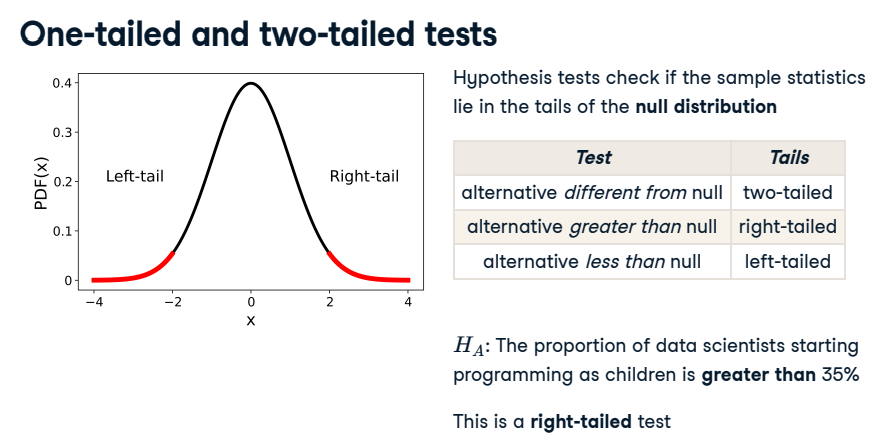

The tails of a distribution are the left and right edges of its PDF. Hypothesis tests determine whether the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true. There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use. If we are checking for a difference compared to a hypothesized value, we look for extreme values in either tail and perform a two-tailed test. If the alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test. Words like "greater" or "exceeds" correspond to a right-tailed test. For the Stack Overflow hypothesis test, we need a right-tailed test since we are looking for extreme values in the right tail.

7. p-values

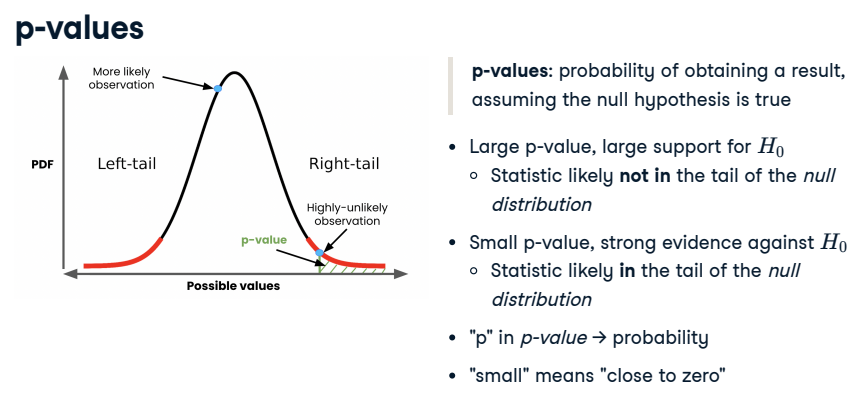

p-values measure the strength of support for the null hypothesis, or in other words, they measure the probability of obtaining a result, assuming the null hypothesis is true. Large p-values mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result. Small p-values mean our statistic is producing a result likely in the tail of our null distribution. Because p-values are probabilities, they are always between zero and one.

8. Calculating the z-score

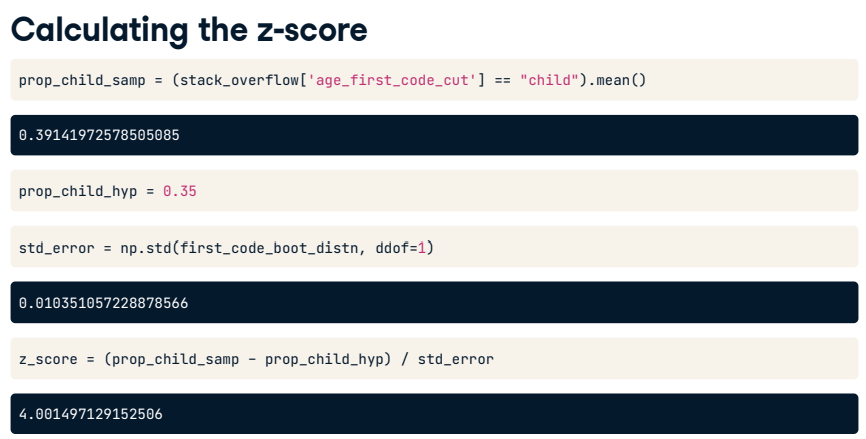

To calculate the p-value, we must first calculate the z-score. We calculate the sample statistic, in this case the proportion of data scientists who started programming as children. The hypothesized value from the null hypothesis is 35 percent. We get the standard error from the standard deviation of the bootstrap distribution, and the z-score is the difference between the proportions, divided by the standard error.

9. Calculating the p-value

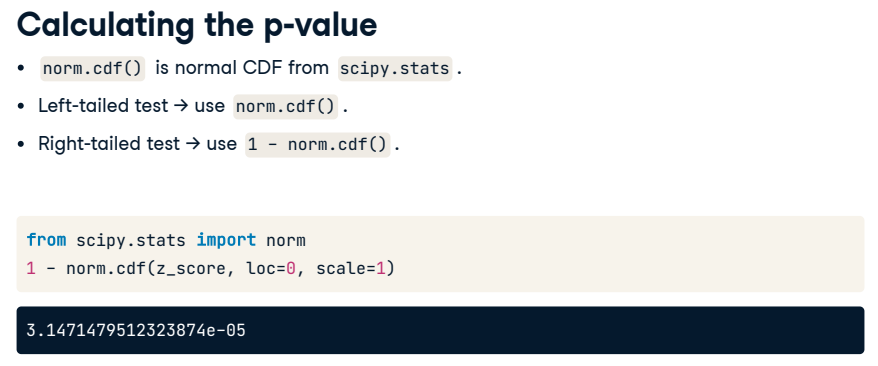

We pass the z-score to the standard normal CDF, norm-dot-cdf, from scipy-dot-stats with the default values of mean zero and standard deviation of one. As we're performing a right-tail test, not a left-tail test, the p-value is calculated by taking one minus the norm-dot-cdf result. The p-value is three out of 100,000.

10. Let's practice!

Go calculate some p-values!

**Criminal trials and hypothesis tests**

In the video, you saw how hypothesis testing follows a similar process to criminal trials.

- Which of the following correctly matches up a criminal trial with properties of a hypothesis test?

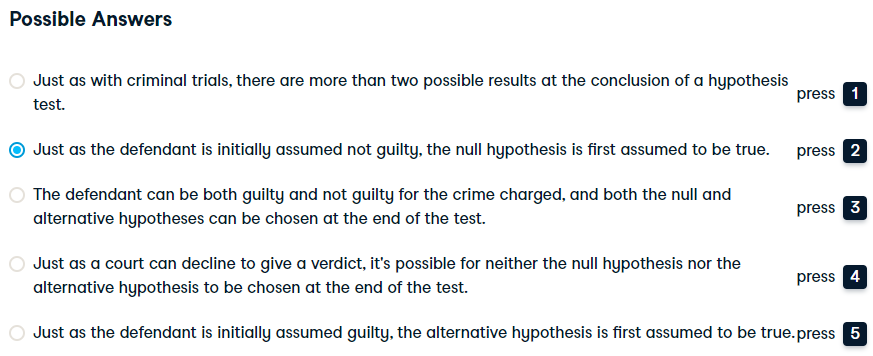

I pronounce you not guilty! It's sometimes helpful to think of your hypothesis test as being a trial of the statistic.

**Exercise**

**Left tail, right tail, two tails**

Hypothesis tests are used to determine whether the sample statistic lies in the tails of the null distribution. However, the way that the alternative hypothesis is phrased affects which tail(s) we are interested in.

**Instructions**

- Determine the appropriate type of hypothesis test for answering these questions.

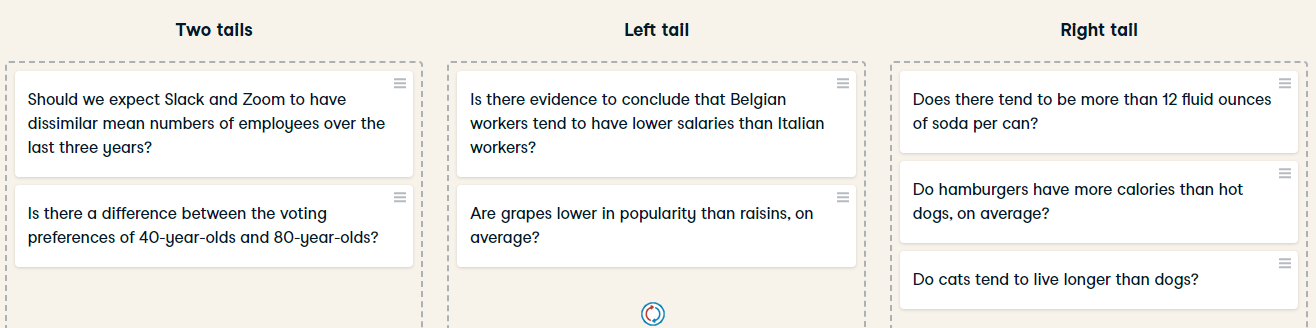

Top tail choices! The tails of the distribution that are relevant depend on whether the alternative hypothesis refers to "greater than", "less than", or "differences between."

**Exercise**

**Calculating p-values**

In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, Ho, is that the proportion of late shipments is six percent.

The alternative hypothesis, Ha, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

**Instructions**

- Question : What type of test should be used for this alternative hypothesis?

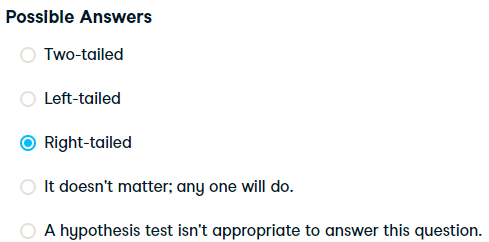

----------

- Calculate the z-score of late_prop_samp.
- Calculate the p-value for the z-score, using a right-tailed test.

In [29]:
late_prop_samp

0.061

In [30]:
late_prop_hyp = 0.06

In [31]:
std_error = np.std(late_shipments_boot_distn, ddof=1)
std_error

0.007513580953163942

In [33]:
from scipy.stats import norm

In [35]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.4470601802519869


Perfect p-value! The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.

### 1 03 Statistical significance

1. Statistical significance

Last time, we introduced p-values.

2. p-value recap

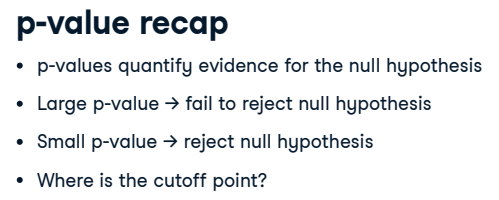

p-values quantify how much evidence there is for the null hypothesis. Large p-values indicate a lack of evidence for the alternative hypothesis, sticking with the assumed null hypothesis instead. Small p-values make us doubt this original assumption in favor of the alternative hypothesis. What defines the cutoff point between a small p-value and a large one?

3. Significance level

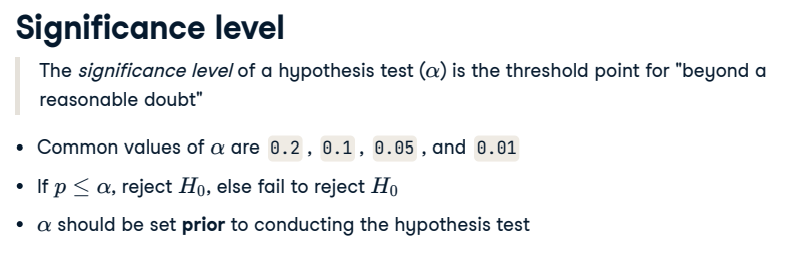

The cutoff point is known as the significance level, and is denoted alpha. The appropriate significance level depends on the dataset and the discipline worked in. Five percent is the most common choice, but ten percent and one percent are also popular. The significance level gives us a decision process for which hypothesis to support. If the p-value is less than or equal to alpha, we reject the null hypothesis. Otherwise, we fail to reject it. It's important that we decide what the appropriate significance level should be before we run our test. Otherwise, there is a temptation to decide on a significance level that lets us choose the hypothesis we want.

4. Calculating the p-value

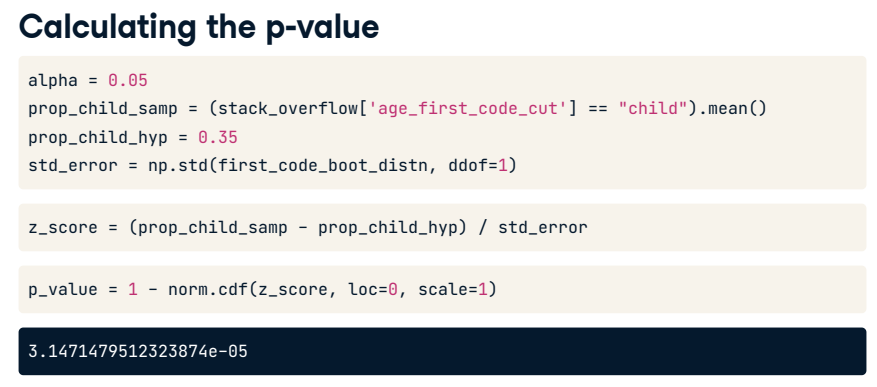

The workflow starts with setting the significance level, in this case point-zero-five. Next, we calculate the sample mean and assign the hypothesized mean. For the z-score, we also need the standard error, which we obtain from the bootstrap distribution. Then we calculate the z-score using the sample mean, hypothesized mean, and standard error, and use the standard normal CDF to get the p-value.

5. Making a decision

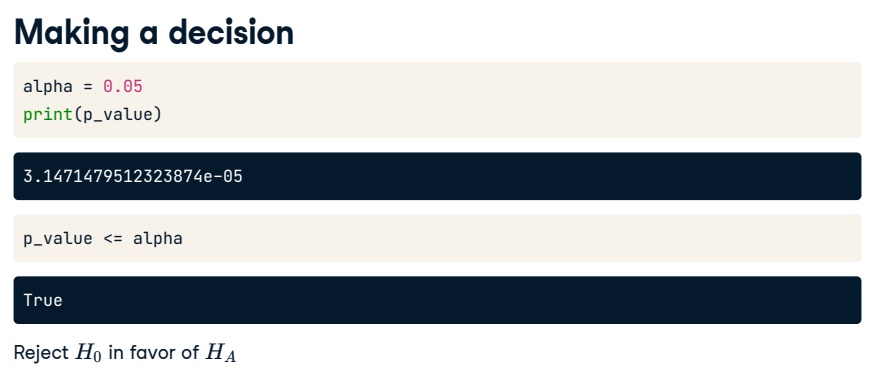

In this case, the p-value of three times ten to the minus five is less than or equal to point-zero-five, so we reject the null hypothesis. We have strong evidence for the alternative hypothesis that the proportion of data scientists that started programming as children is greater than 35 percent.

6. Confidence intervals

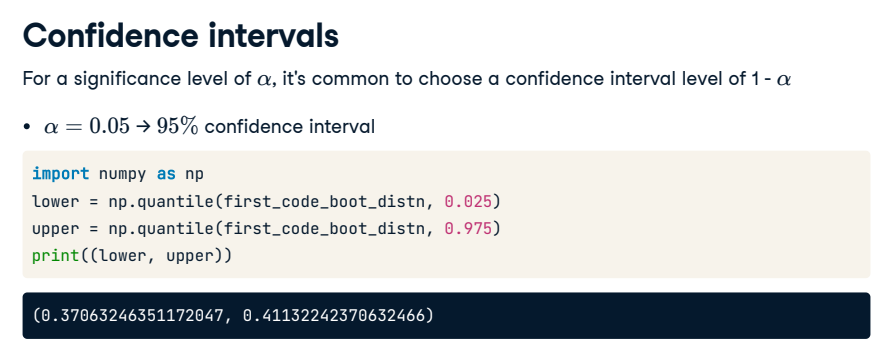

To get a sense of the potential values of the population parameter, it's common to choose a confidence interval level of one minus the significance level. For a significance level of point-zero-five, we'd use a 95 percent confidence interval. Here's the calculation using the quantile method. The interval provides a range of plausible values for the population proportion of data scientists that programmed as children.

7. Types of errors

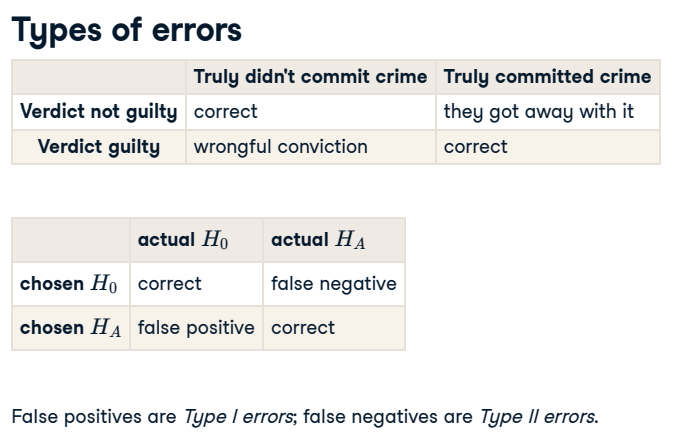

Returning to the criminal trial analogy, there are two possible truth states and two possible test outcomes, amounting to four combinations. Two of these indicate that the verdict was correct. If the defendant didn't commit the crime, but the verdict was guilty, they are wrongfully convicted. If the defendant committed the crime, but the verdict was not guilty, they got away with it. These are both errors in justice. Similarly, for hypothesis testing, there are two ways to get it right, and two types of error. If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error. These errors are sometimes known as type one and type two errors, respectively.

8. Possible errors in our example

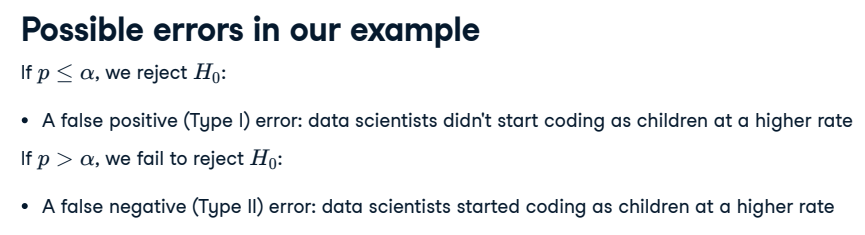

In the case of data scientists coding as children, if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error. Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population. Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.

9. Let's practice!

Let's do some significant exercises.

**Decisions from p-values**

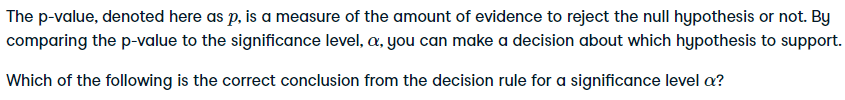

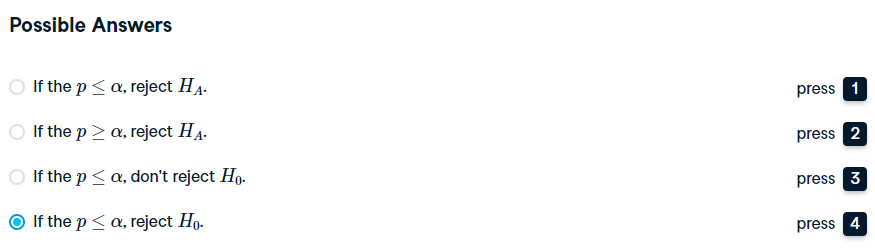

Delightful decision-making. If the p-value is less than or equal to the significance level, you reject the null hypothesis.

**Exercise**

**Calculating a confidence interval**

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

**Instructions**

- Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.
----------
- Question : Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

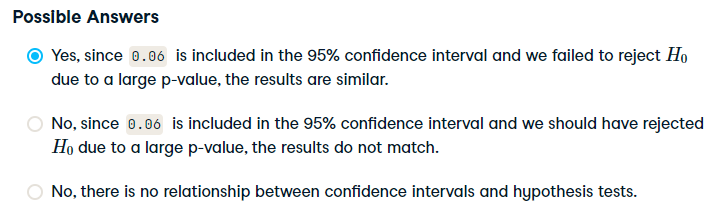

In [36]:
late_prop_samp

0.061

In [37]:
late_shipments_boot_distn

[0.056,
 0.078,
 0.06,
 0.068,
 0.058,
 0.056,
 0.052,
 0.069,
 0.058,
 0.081,
 0.062,
 0.062,
 0.051,
 0.059,
 0.068,
 0.06,
 0.06,
 0.048,
 0.064,
 0.06,
 0.06,
 0.054,
 0.07,
 0.071,
 0.056,
 0.054,
 0.059,
 0.056,
 0.063,
 0.053,
 0.061,
 0.07,
 0.068,
 0.059,
 0.061,
 0.056,
 0.078,
 0.058,
 0.05,
 0.063,
 0.053,
 0.045,
 0.054,
 0.074,
 0.065,
 0.07,
 0.054,
 0.066,
 0.058,
 0.079,
 0.058,
 0.057,
 0.069,
 0.059,
 0.064,
 0.071,
 0.054,
 0.073,
 0.053,
 0.067,
 0.067,
 0.048,
 0.054,
 0.08,
 0.058,
 0.065,
 0.054,
 0.049,
 0.073,
 0.051,
 0.066,
 0.052,
 0.068,
 0.075,
 0.074,
 0.064,
 0.067,
 0.063,
 0.057,
 0.066,
 0.054,
 0.07,
 0.048,
 0.065,
 0.064,
 0.063,
 0.054,
 0.062,
 0.046,
 0.066,
 0.055,
 0.044,
 0.052,
 0.068,
 0.065,
 0.05,
 0.066,
 0.06,
 0.054,
 0.064,
 0.074,
 0.07,
 0.052,
 0.062,
 0.061,
 0.062,
 0.049,
 0.061,
 0.048,
 0.067,
 0.056,
 0.049,
 0.07,
 0.055,
 0.066,
 0.068,
 0.063,
 0.069,
 0.066,
 0.047,
 0.053,
 0.062,
 0.053,
 0.054,
 0.052,
 0.079,
 0.058,

In [38]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


Cool and confident! When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

**Exercise**

**Type I and type II errors**

For hypothesis tests and for criminal trials, there are two states of truth and two possible outcomes. Two combinations are correct test outcomes, and there are two ways it can go wrong.

The errors are known as false positives (or "type I errors"), and false negatives (or "type II errors").

**Instructions**

- Match the scenarios to the appropriate error type, or to "Not an error" for correct decisions.

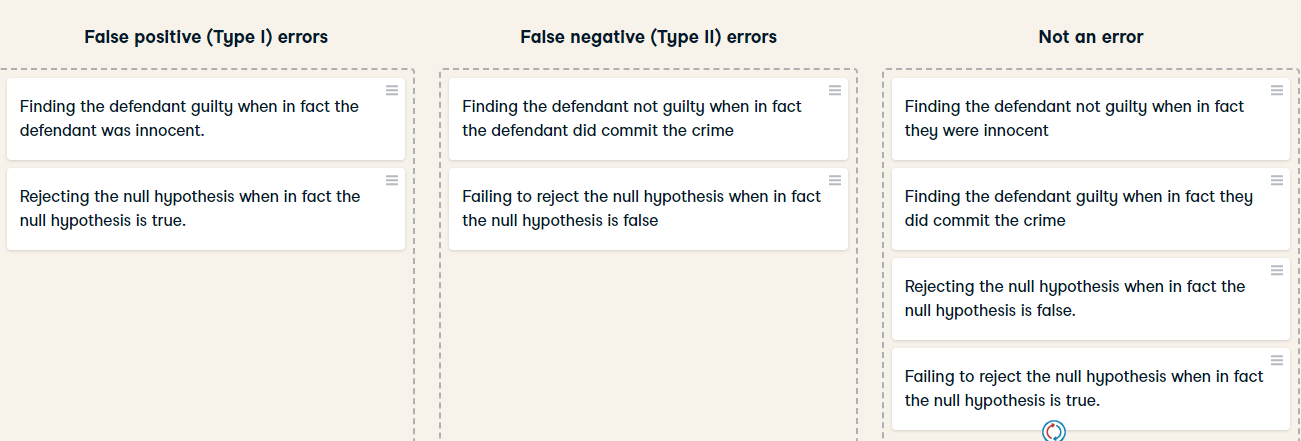

Distinguished decision-making! There are two ways to get the right decision, and two different ways you can make the wrong decision.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Two-Sample and ANOVA Tests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In this chapter, you’ll learn how to test for differences in means between two groups using t-tests and extend this to more than two groups using ANOVA and pairwise t-tests.

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. Proportion Tests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Now it’s time to test for differences in proportions between two groups using proportion tests. Through hands-on exercises, you’ll extend your proportion tests to more than two groups with chi-square independence tests, and return to the one sample case with chi-square goodness of fit tests.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Non-Parametric Tests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Finally, it’s time to learn about the assumptions made by parametric hypothesis tests, and see how non-parametric tests can be used when those assumptions aren't met.